# Customer Churn Prediction

### Importing Necessary Libraries

In [17]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

### Adding the Dataset

In [18]:
df = pd.read_csv('Telco_Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
df.shape

(7043, 21)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Exploratory Data Analysis

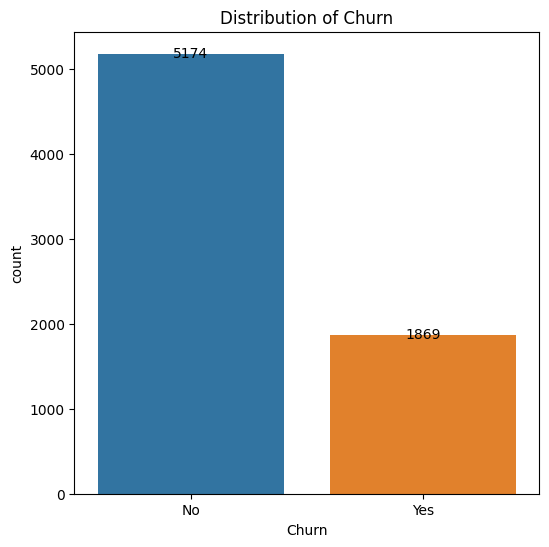

In [21]:
target_count = df['Churn'].value_counts()

plt.figure(figsize=(6,6))

sns.countplot(x='Churn', data = df)

for i, count in enumerate(target_count):
    plt.text(i,count, f'{count}', ha='center', va='center')

plt.title('Distribution of Churn')

plt.show()

c:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\dabl\preprocessing.py:167: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
c:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\dabl\preprocessing.py:167: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
c:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\dabl\preprocessing.py:167: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
c:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib

Target looks like classification
Linear Discriminant Analysis training set score: 0.681


[<AxesSubplot: title={'center': 'Target distribution'}, xlabel='count', ylabel='Churn'>,
 [array([[<AxesSubplot: ylabel='tenure'>, <AxesSubplot: >, <AxesSubplot: >],
         [<AxesSubplot: ylabel='MonthlyCharges'>, <AxesSubplot: >,
          <AxesSubplot: >],
         [<AxesSubplot: xlabel='tenure', ylabel='TotalCharges_dabl_continuous'>,
          <AxesSubplot: xlabel='MonthlyCharges'>,
          <AxesSubplot: xlabel='TotalCharges_dabl...'>]], dtype=object),
  <Figure size 1600x400 with 4 Axes>,
  <Figure size 640x480 with 1 Axes>],
 array([[<AxesSubplot: title={'center': 'Contract'}>,
         <AxesSubplot: title={'center': 'OnlineSecurity'}>,
         <AxesSubplot: title={'center': 'TechSupport'}>,
         <AxesSubplot: title={'center': 'InternetService'}>],
        [<AxesSubplot: title={'center': 'OnlineBackup'}>,
         <AxesSubplot: title={'center': 'PaymentMethod'}>,
         <AxesSubplot: title={'center': 'DeviceProtection'}>,
         <AxesSubplot: title={'center': 'Stream

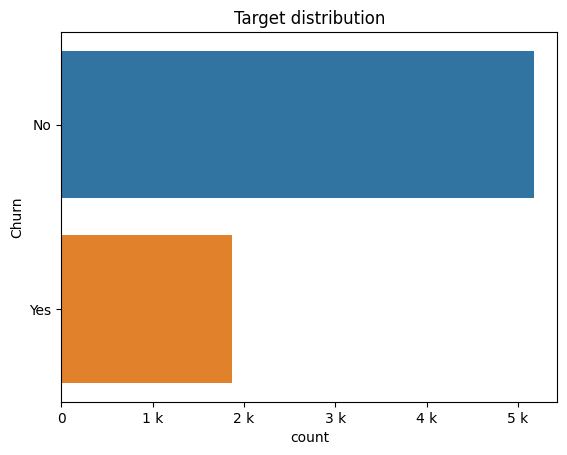

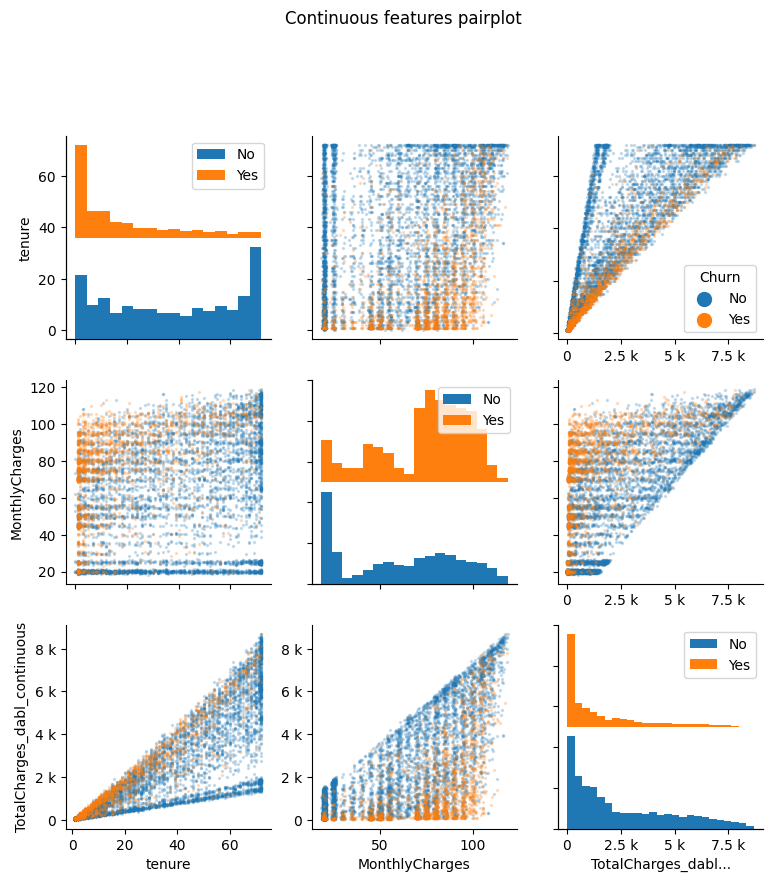

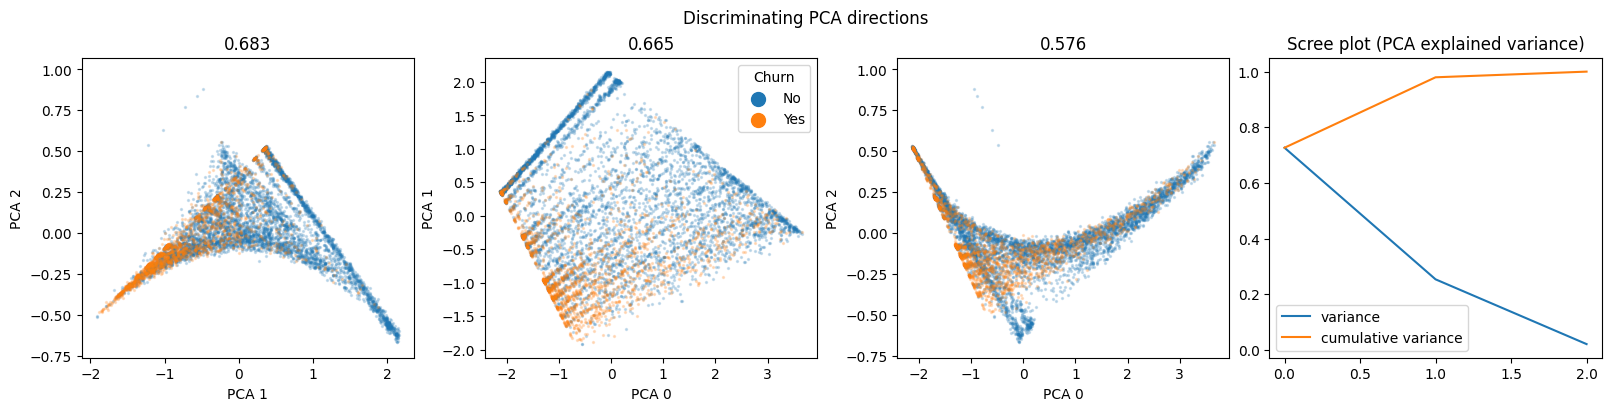

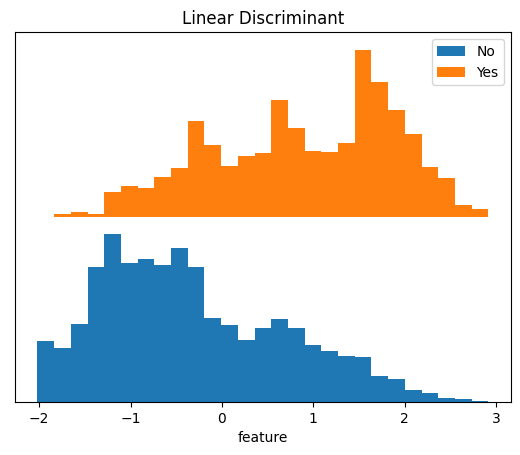

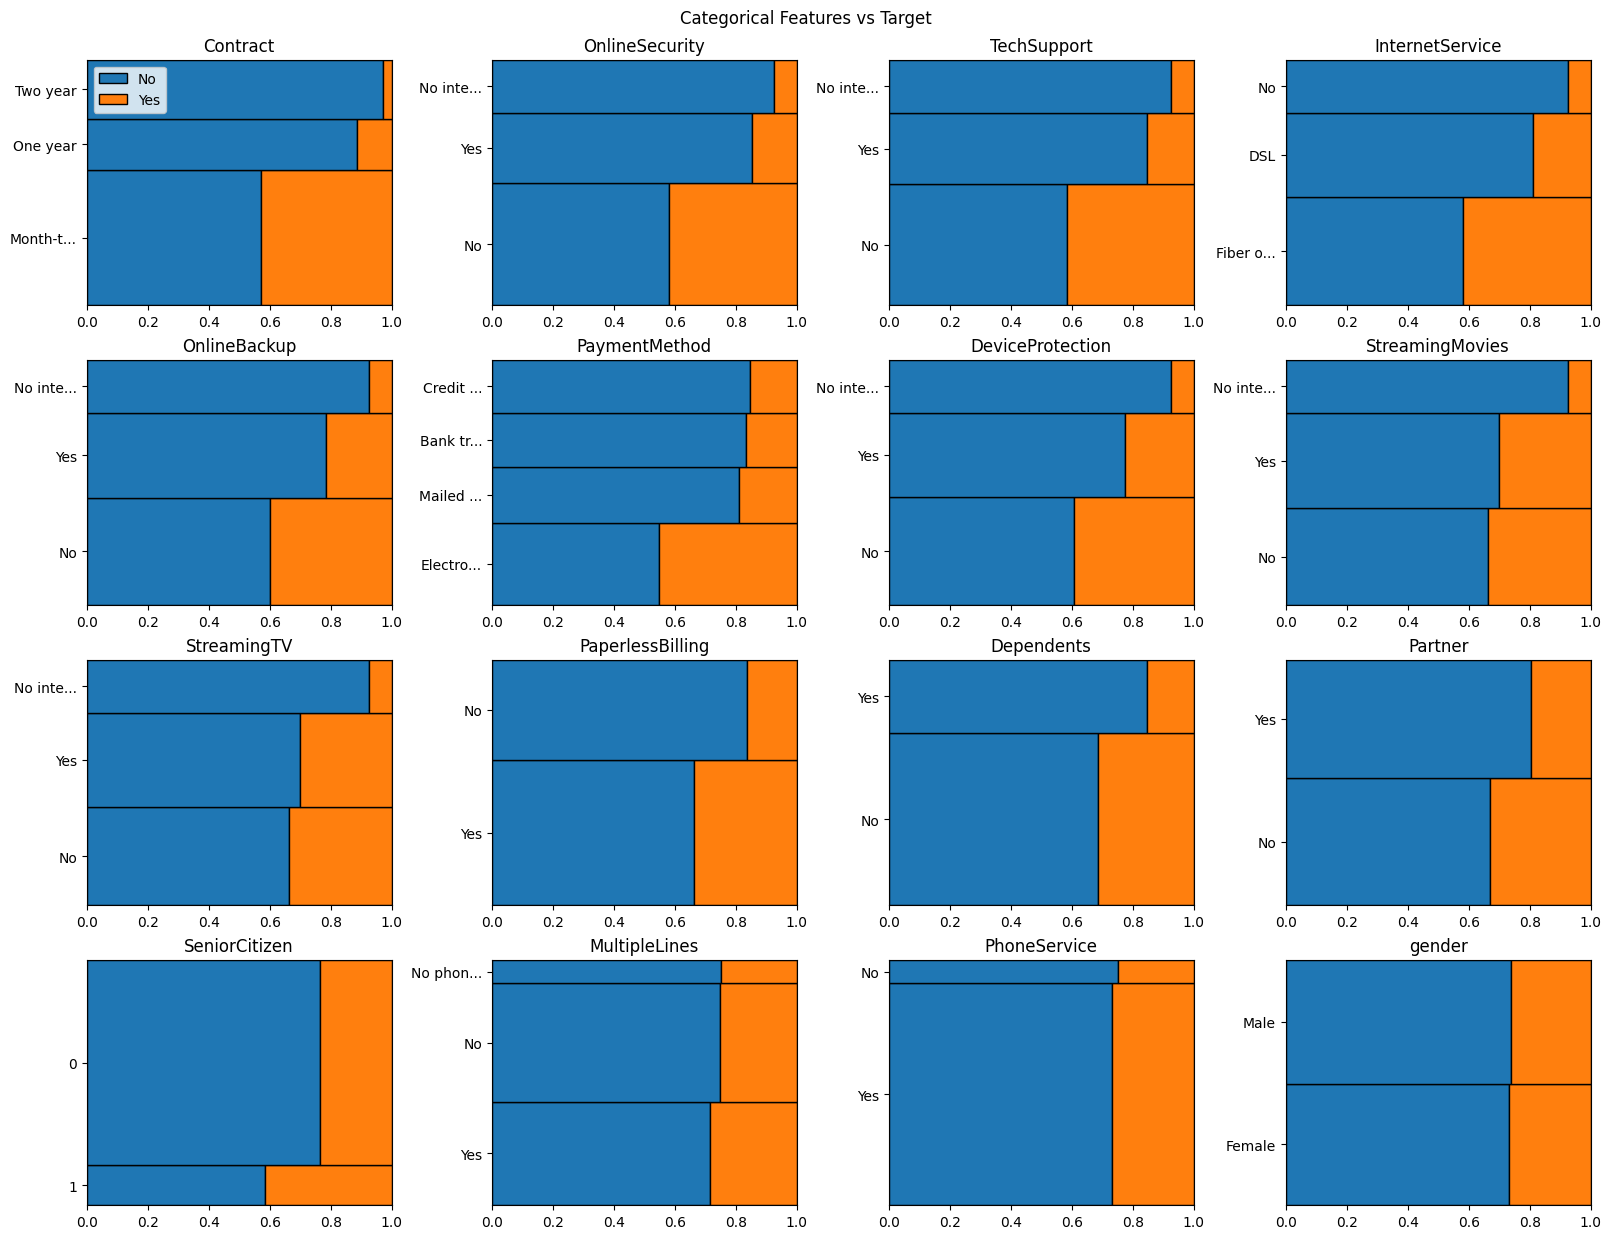

In [22]:
import dabl

dabl.plot(df, target_col='Churn')

In [23]:
try:
    df['TotalCharges'] = df['TotalCharges'].astype(float)
except ValueError as ve:
    print (ve)

could not convert string to float: ' '


In [24]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [25]:
bin_df = pd.DataFrame()

#Update the binning dataframe
bin_df['tenure_bins'] =  pd.qcut(df['tenure'], q=3, labels= ['low', 'medium', 'high'])
bin_df['MonthlyCharges_bins'] =  pd.qcut(df['MonthlyCharges'], q=3, labels= ['low', 'medium', 'high'])
bin_df['TotalCharges_bins'] =  pd.qcut(df['TotalCharges'], q=3, labels= ['low', 'medium', 'high'])
bin_df['Churn'] = df['Churn']

### Data Preprocessing

In [26]:
df.drop(["customerID"], axis=1, inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
# Encoding

def binary_map(feature):
    return feature.map({'Yes':1, 'No': 0})

df['Churn'] = df[['Churn']].apply(binary_map)

df['gender'] = df['gender'].map({'Male':1, 'Female':0})

binary_list = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
df[binary_list] = df[binary_list].apply(binary_map)

df = pd.get_dummies(df, drop_first=True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   bool   
 11  Mult

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


import statsmodels.api as sm
import statsmodels.formula.api as smf

all_columns = [column.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_") for column in df.columns]

df.columns = all_columns

glm_columns = [e for e in all_columns if e not in ['customerID  ', 'Churn']]
glm_columns = ' + '.join(map(str, glm_columns))

glm_model = smf.glm(formula=f'Churn ~ {glm_columns}', data=df, family=sm.families.Binomial())

res = glm_model.fit()
print(res.summary())

In [29]:
corr = df.corr()

fig = px.imshow(corr,width=1000, height=1000)
fig.show()

### Feature Scaling

In [37]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

df['tenure'] = sc.fit_transform(df[['tenure']])
df['MonthlyCharges'] = sc.fit_transform(df[['MonthlyCharges']])
df['TotalCharges'] = sc.fit_transform(df[['TotalCharges']])

### Implementing Machine Learning Models

### Splitting data into testing and training

In [33]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

### Adding Performance Metrics

In [35]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

### Logistic Regression

Accuracy :  0.7988641741599621


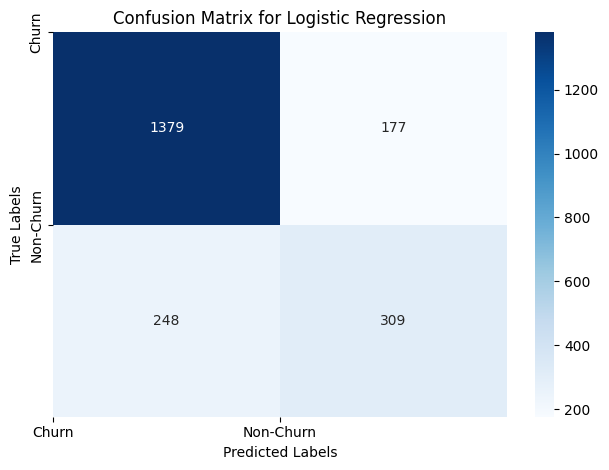

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1556
           1       0.64      0.55      0.59       557

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



In [42]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

lr_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : ", lr_accuracy)

lr_conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(lr_conf_mat, annot=True, fmt="d", cmap="Blues")

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Logistic Regression")
plt.xticks(ticks=[0, 1], labels=["Churn", "Non-Churn"])
plt.yticks(ticks=[0, 1], labels=["Churn", "Non-Churn"])

plt.tight_layout()

plt.show()

lr_class_report = classification_report(y_test, y_pred)
print(lr_class_report)

### KNN

#### Using Cross Validation to find optimal K value

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

k_values = [3,11,15,16,17]

best_score = 0.0
best_k = None

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    scores = cross_val_score(knn, X_train, y_train, cv=5) 
    mean_score = scores.mean()
    
    if mean_score > best_score:
        best_score = mean_score
        best_k = k
        
print(f"Best k: {best_k}")
print(f"Best score: {best_score}")

Best k: 15
Best score: 0.7831643002028398


Accuracy :  0.7799337434926644


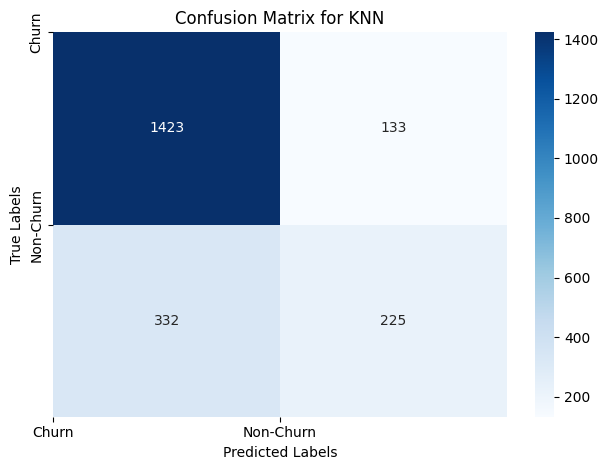

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1556
           1       0.63      0.40      0.49       557

    accuracy                           0.78      2113
   macro avg       0.72      0.66      0.68      2113
weighted avg       0.76      0.78      0.76      2113



In [72]:
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy : ", knn_accuracy)

knn_conf_mat = confusion_matrix(y_test, knn_pred)

sns.heatmap(knn_conf_mat, annot=True, fmt="d", cmap="Blues")

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for KNN")
plt.xticks(ticks=[0, 1], labels=["Churn", "Non-Churn"])
plt.yticks(ticks=[0, 1], labels=["Churn", "Non-Churn"])

plt.tight_layout()

plt.show()

knn_class_report = classification_report(y_test, knn_pred)
print(knn_class_report)

### Naive Bayes 

Accuracy :  0.6460009465215334


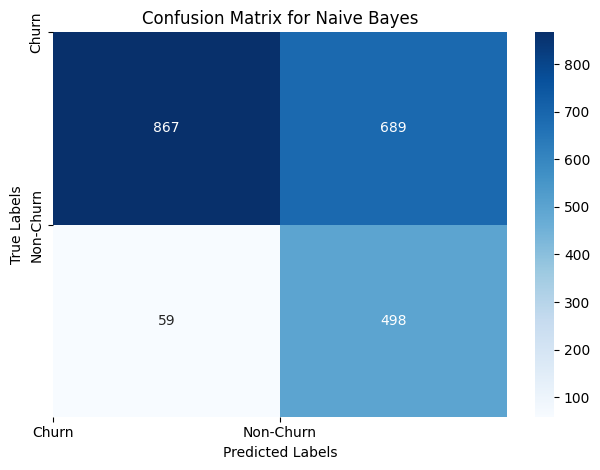

              precision    recall  f1-score   support

           0       0.94      0.56      0.70      1556
           1       0.42      0.89      0.57       557

    accuracy                           0.65      2113
   macro avg       0.68      0.73      0.63      2113
weighted avg       0.80      0.65      0.67      2113



In [73]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,y_train)

nb_pred = nb.predict(X_test)

nb_accuracy = accuracy_score(y_test, nb_pred)
print("Accuracy : ", nb_accuracy)

nb_conf_mat = confusion_matrix(y_test, nb_pred)

sns.heatmap(nb_conf_mat, annot=True, fmt="d", cmap="Blues")

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Naive Bayes")
plt.xticks(ticks=[0, 1], labels=["Churn", "Non-Churn"])
plt.yticks(ticks=[0, 1], labels=["Churn", "Non-Churn"])

plt.tight_layout()

plt.show()

nb_class_report = classification_report(y_test, nb_pred)
print(nb_class_report)


### Random Forest

Accuracy :  0.7851396119261713


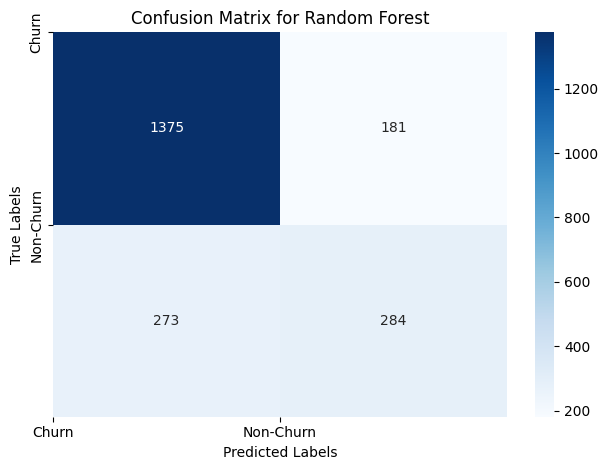

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1556
           1       0.61      0.51      0.56       557

    accuracy                           0.79      2113
   macro avg       0.72      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



In [74]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy : ", rf_accuracy)

rf_conf_mat = confusion_matrix(y_test, rf_pred)

sns.heatmap(rf_conf_mat, annot=True, fmt="d", cmap="Blues")

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Random Forest")
plt.xticks(ticks=[0, 1], labels=["Churn", "Non-Churn"])
plt.yticks(ticks=[0, 1], labels=["Churn", "Non-Churn"])

plt.tight_layout()

plt.show()

rf_class_report = classification_report(y_test, rf_pred)
print(rf_class_report)

### Decision Tree Classifier

Accuracy :  0.780407004259347


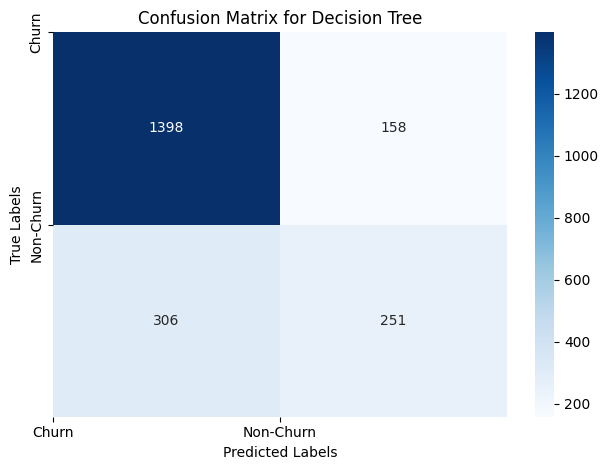

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1556
           1       0.61      0.45      0.52       557

    accuracy                           0.78      2113
   macro avg       0.72      0.67      0.69      2113
weighted avg       0.77      0.78      0.77      2113



In [75]:
from sklearn.tree import DecisionTreeClassifier

dt =  DecisionTreeClassifier(max_depth=5, random_state=42)

dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_pred)
print("Accuracy : ", dt_accuracy)

dt_conf_mat = confusion_matrix(y_test, dt_pred)

sns.heatmap(dt_conf_mat, annot=True, fmt="d", cmap="Blues")

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Decision Tree")
plt.xticks(ticks=[0, 1], labels=["Churn", "Non-Churn"])
plt.yticks(ticks=[0, 1], labels=["Churn", "Non-Churn"])

plt.tight_layout()

plt.show()

dt_class_report = classification_report(y_test, dt_pred)
print(dt_class_report)



### Saving the Model for Streamlit

In [76]:
import pickle

with open('lr.pkl', 'wb') as file:
    pickle.dump(rf, file)